<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/05_Regresja_liniowa_case_study_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(42)
np.set_printoptions(precision = 4, suppress= True)
sklearn.__version__

'1.6.1'

In [3]:
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df = df_raw.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Eksploracja i przygotowainie  danych

In [6]:
#sprawdzenie  czy nie ma duplikatow
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df[df['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df= df.drop_duplicates()
df.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
#zmiana typu danych
cat_cols = [col for col in df.columns if df[col].dtype =="O"]
cat_cols

['sex', 'smoker', 'region']

In [13]:
for col in cat_cols:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [15]:
df.describe(include = "category").T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [16]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<Axes: ylabel='count'>

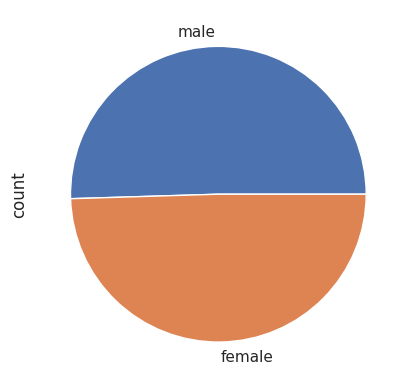

In [17]:
df.sex.value_counts().plot(kind = "pie")

In [18]:
df.smoker.value_counts()

,count
smoker,
no,1063
yes,274


In [19]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


<Axes: ylabel='Frequency'>

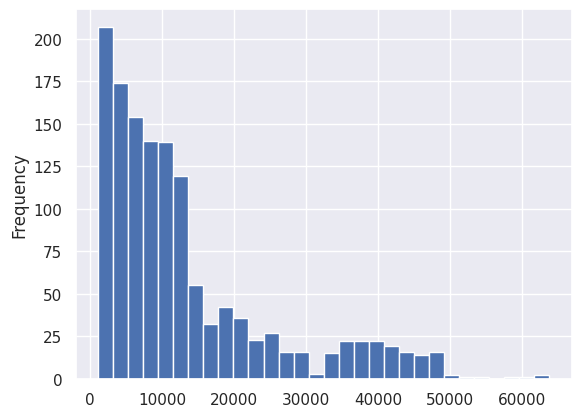

In [21]:
df.charges.plot(kind= 'hist', bins = 30)

In [24]:
import plotly.express as px
px.histogram(df, x ="charges", width = 700, height = 700, nbins =50, facet_col = 'smoker', facet_row = "sex")


In [29]:
px.histogram(df, x='smoker', facet_col='sex', color='sex', width=700, height=400)

In [34]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype=int)
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [36]:
#zbadanie korelacji
corr= df_dummies.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


<Axes: >

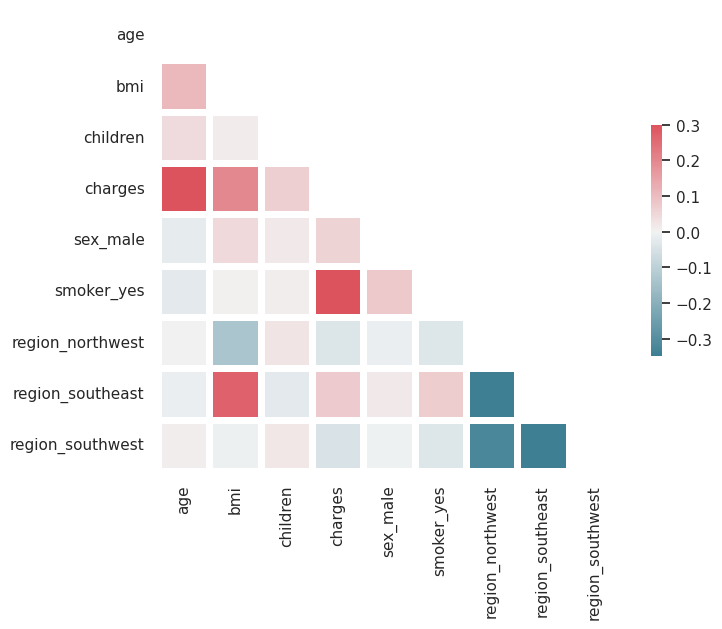

In [37]:
sns.set(style = "white")
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square= True, linewidths=5, cbar_kws={"shrink": .5})

In [38]:
df_dummies.corr().charges.sort_values(ascending = False)

,charges
charges,1.000000
smoker_yes,0.787234
age,0.298308
bmi,0.198401
region_southeast,0.073578
children,0.067389
sex_male,0.058044
region_northwest,-0.038695
region_southwest,-0.043637


<Axes: >

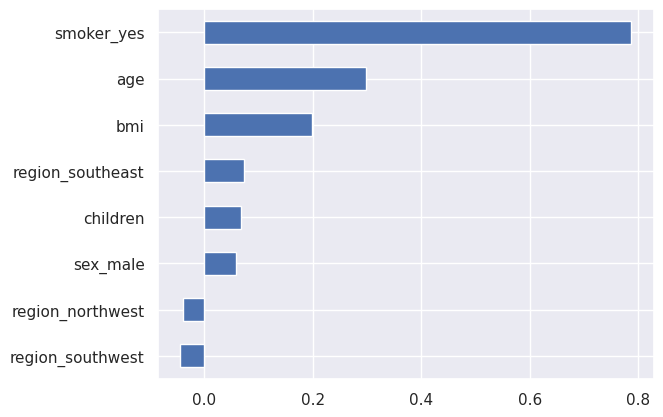

In [44]:
sns.set()
df_dummies.corr()["charges"].sort_values()[:-1].plot(kind = "barh")

In [50]:
data = df_dummies.copy()
target = data.pop("charges")
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [51]:
target.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size= 0.2)

In [56]:
print(f'X_train shape: {X_train.shape},\ny_train shape: {y_train.shape},\nX_test shape: {X_test.shape},\ny_test shape: {y_test.shape}')


X_train shape: (1069, 8),
y_train shape: (1069,),
X_test shape: (268, 8),
y_test shape: (268,)


In [57]:
#regresja liniowa

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
print(f'R2 Score: {regressor.score(X_test, y_test):.4f}')

R2 Score: 0.8069


In [64]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([ 8143.6939,  5737.1157, 14369.3149, 31745.5136,  8962.3867,
       13149.7224, 30446.7607,  1453.2888, 10633.0184, 11318.9438])

In [69]:
y_true = y_test.copy()
predictions = pd.DataFrame(data = {"y_true": y_true, "y_pred": y_pred})
predictions["error"]= predictions["y_true"] - predictions["y_pred"]
predictions.head()

,y_true,y_pred,error
900,8688.85885,8143.693884,545.164966
1064,5708.86700,5737.115683,-28.248683
1256,11436.73815,14369.314876,-2932.576726
298,38746.35510,31745.513636,7000.841464
237,4463.20510,8962.386657,-4499.181557


<Axes: ylabel='Frequency'>

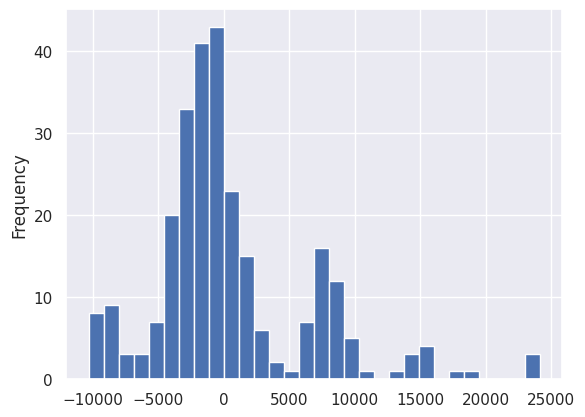

In [71]:
predictions.error.plot(kind ="hist", bins =30)

In [72]:
from sklearn.metrics import  mean_absolute_error

In [73]:
mae = mean_absolute_error(y_true,y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 4177.05


In [74]:
regressor.intercept_

np.float64(-11092.65229594595)

In [75]:
regressor.coef_

array([  248.2107,   318.7014,   533.01  ,  -101.5421, 23077.7646,
        -391.7615,  -838.9196,  -659.1398])

In [77]:
data.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')